<a href="https://colab.research.google.com/github/Vikram77727/ML_CODES/blob/main/ML_INTERNAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CORRELATION CODE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("/content/drive/MyDrive/FeatureEngg-Datasets/Qinspection.csv")
print(df)
print(df.shape)
df.isnull().sum()
df.info()
features = df.iloc[:,0:6]   # first 6 columns
classlabel = df.iloc[:,-1]  # last column (target)
stds = StandardScaler()
tfeatures = stds.fit_transform(features)
tdf = pd.DataFrame(tfeatures)
features = ['feature1', 'feature2', 'feature3', 'feature4','feature5','feature6']
tdf.columns=features
cor_matrix = tdf.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [c for c in upper_tri.columns if any(upper_tri[c] > 0.95)]
df1 = tdf.drop(to_drop, axis=1)
new_data = pd.concat([df1, classlabel], axis=1)
print(new_data)
print(new_data.shape)

     feature1  feature2  feature3  feature4  feature5  feature6 class
0         4.9       4.7       3.2       1.3       0.2       0.3     A
1         4.8       4.6       3.1       1.5       0.2       0.3     A
2         5.2       5.0       3.6       1.4       0.2       0.3     A
3         5.6       5.4       3.9       1.7       0.4       0.5     A
4         4.8       4.6       3.4       1.4       0.3       0.4     A
..        ...       ...       ...       ...       ...       ...   ...
139       7.0       6.8       3.2       5.9       2.3       2.4     C
140       6.9       6.7       3.3       5.7       2.5       2.6     C
141       6.9       6.7       3.0       5.2       2.3       2.4     C
142       6.5       6.3       2.5       5.0       1.9       2.0     C
143       6.7       6.5       3.0       5.2       2.0       2.1     C

[144 rows x 7 columns]
(144, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column    Non-Null

MUTUAL INFORMATION

----------------------------
NAME         MUTUAL INFORMATION SCORE
----------------------------
feature1   0.4599
feature2   0.4982
feature3   0.2453
feature4   0.9913
feature5   0.9761
feature6   0.9863
----------------------------


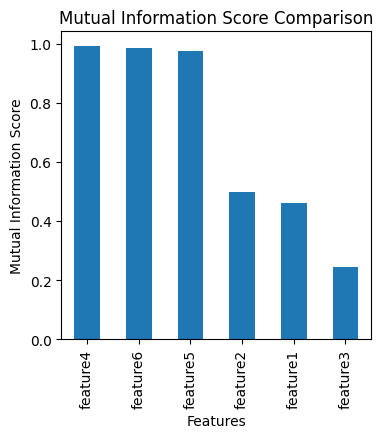

Selected Feature Indexes: (array([3, 4, 5]),)


In [ ]:
# 1. Load dataset
import pandas as pd
dataframe=pd.read_csv("/content/drive/MyDrive/FeatureEngg-Datasets/Qinspection.csv")


# 2. Define features and target
features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']
predictors = dataframe.loc[:, features]
label = dataframe.iloc[:, -1]   # last column as target

# 3. Compute Mutual Information (MI) scores
from sklearn.feature_selection import mutual_info_classif
MI_score = mutual_info_classif(predictors, label, random_state=0)

# 4. Print feature names with MI scores
print('----------------------------')
print('NAME         MUTUAL INFORMATION SCORE')
print('----------------------------')
for feature, score in zip(features, MI_score):
    print(f"{feature:<10} {score:.4f}")
print('----------------------------')

# 5. Visualize MI scores in bar chart
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4,4))
MI = pd.Series(MI_score, index=features)
MI.sort_values(ascending=False, inplace=True)
MI.plot.bar()
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

# 6. Select features with high MI (≥ 0.5)
to_select = np.where(MI_score >= 0.5)
print('Selected Feature Indexes:', to_select)


chi2

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# 1. Load dataset (Iris for demo)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
# Converts target array into a Pandas Series for easier handling.
# Target classes: 0 → setosa; 1 → versicolor; 2 → virginica
print(X)

# 2. Scale features to non-negative values (required by chi2)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X_scaled)
# MinMaxScaler scales each feature to the range [0, 1].
# fit() computes min and max; transform() scales the values.
# We wrap the output as a DataFrame and retain original column names.

# 3. Apply Chi-Square test
k = 2  # Number of top features to select
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_reduced = chi2_selector.fit_transform(X_scaled, y)
# fit(): Computes Chi-Square scores between each feature and the target.
# transform(): Selects top k features based on scores.
# X_reduced: NumPy array with only top k features.

# 4. Get Chi-Square scores
scores = chi2_selector.scores_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': scores
}).sort_values(by='Chi2 Score', ascending=False)
# Chi-Square scores are sorted in descending order.

# 5. Display results
print("Chi-Square Scores for Each Feature:")
print(feature_scores)

print("\nReduced Dataset (Top", k, "features):")
selected_columns = X.columns[chi2_selector.get_support()]
# get_support() returns a boolean array indicating selected features.[False,False,True,True]
# This masks X.columns to return selected feature names.

X_reduced_df = pd.DataFrame(X_reduced, columns=selected_columns)
print(X_reduced_df.head())


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

Anova

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# 1. Load a sample dataset (Iris)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. Optional: Scale the features (recommended for ANOVA)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#This creates a StandardScaler object from sklearn.preprocessing.
#It does not perform any transformation yet — it just initializes the scaler.
#fit() computes: the mean and standard deviation of each column in X.
#transform() then standardizes the data:

# 3. Apply ANOVA F-test for feature selection
k = 2  # Select top-k features
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_reduced = anova_selector.fit_transform(X_scaled, y)

# 4. Get ANOVA F-scores
scores = anova_selector.scores_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-Score': scores
}).sort_values(by='ANOVA F-Score', ascending=False)

# 5. Display results
print("ANOVA F-Scores for Each Feature:")
print(feature_scores)

print("\nReduced Dataset (Top", k, "features):")
selected_columns = X.columns[anova_selector.get_support()]
X_reduced_df = pd.DataFrame(X_reduced, columns=selected_columns)
print(X_reduced_df.head())


ANOVA F-Scores for Each Feature:
             Feature  ANOVA F-Score
2  petal length (cm)    1180.161182
3   petal width (cm)     960.007147
0  sepal length (cm)     119.264502
1   sepal width (cm)      49.160040

Reduced Dataset (Top 2 features):
   petal length (cm)  petal width (cm)
0          -1.340227         -1.315444
1          -1.340227         -1.315444
2          -1.397064         -1.315444
3          -1.283389         -1.315444
4          -1.340227         -1.315444


variance threeshold

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
dataframe=pd.read_csv("/content/drive/MyDrive/FeatureEngg-Datasets/Qinspection.csv")
print('-------------------------------------------------------------------------')
print('ORIGINAL DATASET')
print('-------------------------------------------------------------------------')
display(dataframe)
features = ['feature1', 'feature2', 'feature3', 'feature4','feature5','feature6']
X=dataframe.loc[:,features].values
X=dataframe.iloc[:,0:6]
label = dataframe.iloc[:,-1]
selector = VarianceThreshold(threshold=0.2)
data=selector.fit_transform(X)
print('----------------------')
print(' FEATURE and its VARIANCE')
print('----------------------')
for feature in zip(features, selector.variances_):
    display(feature)
dflabel=pd.DataFrame(label)
data=pd.DataFrame(data)
dfnew=pd.concat([data,dflabel],axis=1)
dfnew.head()

-------------------------------------------------------------------------
ORIGINAL DATASET
-------------------------------------------------------------------------


,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A
...,...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4,C
140,6.9,6.7,3.3,5.7,2.5,2.6,C
141,6.9,6.7,3.0,5.2,2.3,2.4,C
142,6.5,6.3,2.5,5.0,1.9,2.0,C


----------------------
 FEATURE and its VARIANCE
----------------------


('feature1', np.float64(0.6976345486111111))

('feature2', np.float64(0.6976345486111113))

('feature3', np.float64(0.19400414737654317))

('feature4', np.float64(3.1096484375))

('feature5', np.float64(0.5760411844135802))

('feature6', np.float64(0.5760411844135803))

,0,1,2,3,4,class
0,4.9,4.7,1.3,0.2,0.3,A
1,4.8,4.6,1.5,0.2,0.3,A
2,5.2,5.0,1.4,0.2,0.3,A
3,5.6,5.4,1.7,0.4,0.5,A
4,4.8,4.6,1.4,0.3,0.4,A


PCA

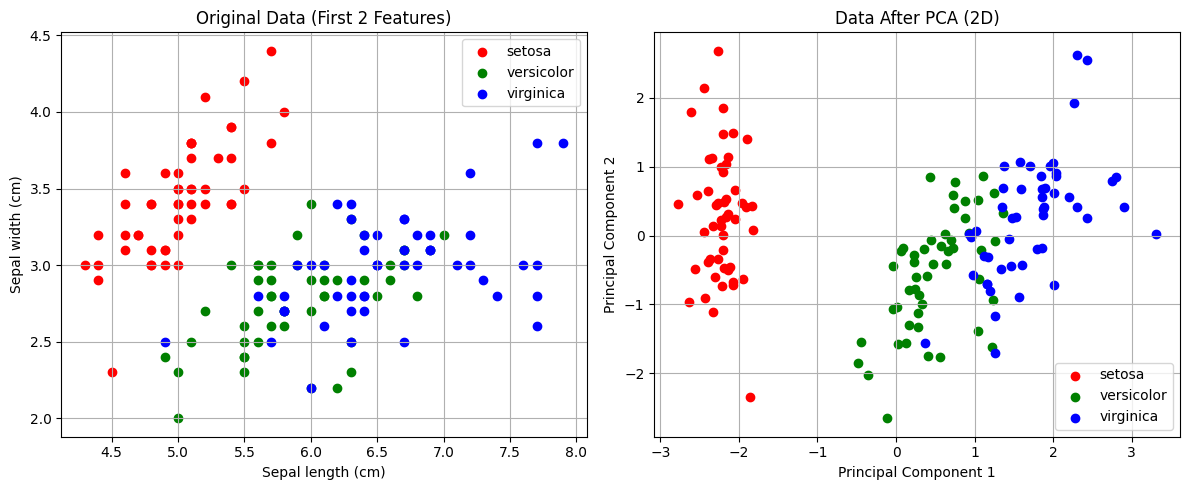

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data         # Feature matrix (150 samples x 4 features)
y = iris.target       # Target labels (0, 1, 2)
df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = y
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# ---- Before PCA: Original features (first two) ----
plt.subplot(1, 2, 1)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Original Data (First 2 Features)')
plt.legend()
plt.grid(True)

# ---- After PCA: First 2 Principal Components ----
plt.subplot(1, 2, 2)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=color, label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA (2D)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


LDA


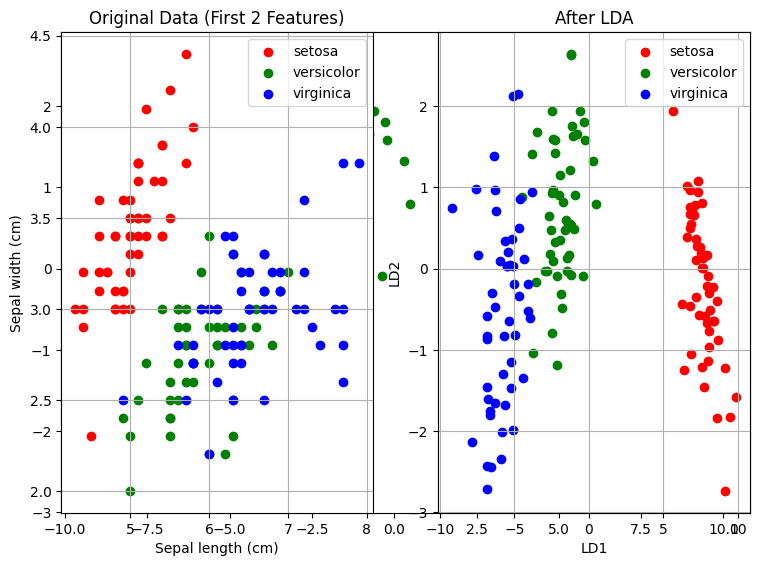

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
target_names
# Step 1: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 2: Apply LDA (we choose 2 components since there are 3 classes)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
# Step 3: Plot the LDA results
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    plt.scatter(X_lda[y == target, 0], X_lda[y == target, 1], c=color, label=label)

# --- Before LDA: Original data (first two features) ---
plt.subplot(1, 2, 1)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Original Data (First 2 Features)')
plt.legend()
plt.grid(True)

# --- After LDA: LD1 vs LD2 ---
plt.subplot(1, 2, 2)
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], target_names):
    plt.scatter(X_lda[y == target, 0], X_lda[y == target, 1], c=color, label=label)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('After LDA')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

KNN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/FeatureEngg-Datasets/defaulter.csv")
df.head()
df.info()
df.describe()
print("Shape:", df.shape)
print(df.isnull().sum())
df = pd.get_dummies(df, columns=['student'], drop_first=True)
df = pd.get_dummies(df, columns=['defaulter'], drop_first=True)
X=df.drop("defaulter_Yes",axis=1)
y=df["defaulter_Yes"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[['balance', 'income']] = sc.fit_transform(X_train[['balance', 'income']])
X_test[['balance', 'income']] = sc.transform(X_test[['balance', 'income']])
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  10000 non-null  object 
 1   student    10000 non-null  object 
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB
Shape: (10000, 4)
defaulter    0
student      0
balance      0
income       0
dtype: int64
Accuracy: 0.9736666666666667

Confusion Matrix:
 [[2889   20]
 [  59   32]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99      2909
        True       0.62      0.35      0.45        91

    accuracy                           0.97      3000
   macro avg       0.80      0.67      0.72      3000
weighted avg       0.97      0.97      0.97      3000



DECISION CLASSIFIER


In [ ]:
# df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/pima-indians-diabetes.csv")
df = pd.read_csv("/content/drive/MyDrive/FeatureEngg-Datasets/pima-indians-diabetes.csv")  # replace with your path
df.head()
 # check target distribution

print(df.shape)
print(df.info())
print(df['class'].value_counts())
df.head()
X = df.drop("class", axis=1)  # all columns except target
y = df["class"]               # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
class
0    500
1    268
Name: count, dtype: int64
Accuracy: 0.7467532467532467

Confusion Matrix:
 [[80 19]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted 

REGRESSIONS


MULTILINEAR REGRESSION ON BOSTON HOUSE PRICES DATASET

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/boston.csv")
df.columns
df.head()
df = df.drop(columns=["Unnamed: 0"])
# Check for missing values
print(df.isnull().sum())
# Input Data
x = df.drop(columns=["PRICE"])

# Output Data
y = df["PRICE"]


# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and deprecated to model_selection
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
                                                    random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

# predicting the test set results
y_pred = regressor.predict(xtest)
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
import matplotlib.pyplot as plt
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

LINEAR REGRESSION USING GRADIENT DESCENT ON COMPUTERS DATASET

Epoch 0: m=0.8851, c=1.9443, Loss=11434.0714
Epoch 100: m=38.5036, c=84.5796, Loss=225.5813
Epoch 200: m=43.4926, c=95.5387, Loss=28.4470
Epoch 300: m=44.1542, c=96.9921, Loss=24.9798
Epoch 400: m=44.2419, c=97.1848, Loss=24.9188
Epoch 500: m=44.2536, c=97.2104, Loss=24.9178
Epoch 600: m=44.2551, c=97.2138, Loss=24.9177
Epoch 700: m=44.2553, c=97.2142, Loss=24.9177
Epoch 800: m=44.2553, c=97.2143, Loss=24.9177
Epoch 900: m=44.2554, c=97.2143, Loss=24.9177

Final model: y = 44.2554x + 97.2143


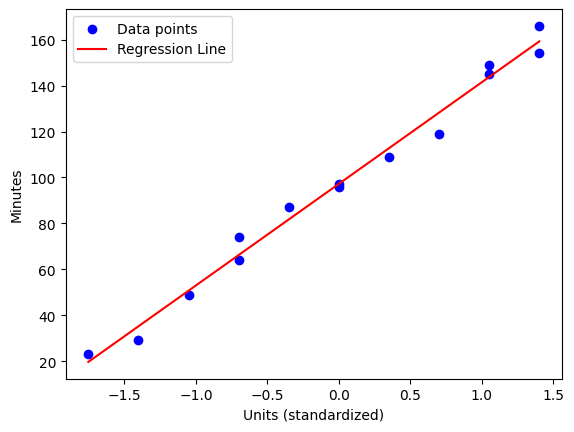

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/FeatureEngg-Datasets/computers.csv")
data.head()
data.columns

X = data['Units'].values
y = data['Minutes'].values

# Normalize features (important for gradient descent convergence)
X = (X - np.mean(X)) / np.std(X)

# Parameters
m = 0  # slope
c = 0  # intercept
L = 0.01  # learning rate
epochs = 1000  # iterations

n = float(len(X))  # number of data points

# Gradient Descent
for i in range(epochs):
    y_pred = m * X + c

    #compute gradients
    D_m = (-2/n) * sum(X * (y - y_pred))  # derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)        # derivative wrt c
    m = m - L * D_m
    c = c - L * D_c

    if i % 100 == 0:  # print every 100 iterations
        loss = np.mean((y - y_pred) ** 2)
        print(f"Epoch {i}: m={m:.4f}, c={c:.4f}, Loss={loss:.4f}")




# Final line equation
print(f"\nFinal model: y = {m:.4f}x + {c:.4f}")
# Plot
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, m*X + c, color='red', label="Regression Line")
plt.xlabel("Units (standardized)")
plt.ylabel("Minutes")
plt.legend()
plt.show()

Logistic Regression on Coronary heart disease dataset

In [ ]:
chd=pd.read_csv("/content/chd.csv")
chd.shape

plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")
# Importing the required class
from sklearn.model_selection import train_test_split

# Specifying the columns as predictor and target variable
predictors = ["age"]
target = "chd"

X = chd[predictors] # X contains the predictor values or input data
y = chd[target] # y contains the target labels

# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
# Importing the required class
from sklearn.linear_model import LogisticRegression

# Creating the object of the class LogisticRegression
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train,y_train)

# Getting the intercept and the coefficients of the model
print("Intercept:",model.intercept_,"\nCoefficients:", model.coef_)
#Make Predictions#
y_pred = model.predict(X_test)

# Evaluate the Model
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm
# Converting the confusion matrix into a DataFrame for better readability
pd.DataFrame(cm,columns=model.classes_,index=model.classes_)
test_accuracy=model.score(X_test, y_test)
print("Test accuracy = ", test_accuracy)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Predicting the probabilities for each of the class labels and the final class for a new data
test=np.array([29]).reshape(1,-1)
print("\nProbabilities:",model.predict_proba(test))
print("\nChd value:",model.predict(test))
# Getting the probability for class label '0' for all the samples
pred_test_0 = model.predict_proba(X_test)[:,0]

# Getting the probability for class label '1' for all the samples
pred_test_1 = model.predict_proba(X_test)[:,1]

# Plotting the actual class labels or target values for the samples
plt.scatter(X_test['age'],y_test, label = "actual target value")

# Plotting the predicted probability for class label '1' for all the samples
plt.scatter(X_test['age'],pred_test_0, label = "probability of class '0'",color = "orange", marker='o')

# Plotting the predicted probability for class label '1' for all the samples
plt.scatter(X_test['age'],pred_test_1, label = "probability of class '1'",color = "green", marker='o')

# Adding the xlabel, ylabel, title and the legend
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Predicted probabilities")
plt.legend()
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))
# Importing the required function
from sklearn.metrics import classification_report

# Generating the report and printing the same
print(classification_report(y_test,y_pred))

LOGISTIC REGRESSION ON PREGNANT WOMEN DIABETES DATASET

In [ ]:
import pandas as pd

url = "/content/pima-indians-diabetes(1).csv.xlsx"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Use read_excel instead of read_csv
df = pd.read_excel(url, header=None, names=columns)

print("First 5 rows of the dataset:")
df.head()
if df.iloc[0].str.contains("preg", case=False).any():
    df = df.drop(0)
df.info()
from sklearn.preprocessing import StandardScaler
# Step 2: Split the Data into Features and Target
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target

# Step 3: Apply Standard Scaling to the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = (y > 0.5).astype(int)
from sklearn.model_selection import train_test_split
# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
from sklearn.linear_model import LogisticRegression
# Step 5: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(" The confusion matrix is=")
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt
print(" The confusion matrix is in the graphical form")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')